In [1]:
import random

In [2]:
X = random.sample(range(0, 100000), 1100)

In [3]:
X

[83432,
 68669,
 58597,
 77041,
 56734,
 793,
 62979,
 66085,
 26064,
 35674,
 38101,
 48927,
 2854,
 42243,
 55751,
 29895,
 62005,
 93454,
 70966,
 48415,
 33260,
 78836,
 81727,
 84630,
 5199,
 32322,
 71761,
 29044,
 23679,
 30940,
 94039,
 8353,
 15157,
 29611,
 81162,
 69161,
 20410,
 76439,
 50822,
 65046,
 11078,
 22312,
 99996,
 13374,
 67437,
 89759,
 25382,
 50578,
 30931,
 13720,
 74587,
 48917,
 61758,
 71587,
 97267,
 44504,
 76882,
 60825,
 38375,
 22185,
 99696,
 81683,
 54143,
 3900,
 47132,
 23675,
 64364,
 33430,
 65339,
 41147,
 27509,
 77356,
 23652,
 82316,
 57910,
 88419,
 60919,
 89617,
 24918,
 30118,
 79,
 7807,
 89591,
 82946,
 87774,
 32802,
 23889,
 49182,
 83540,
 38006,
 38058,
 25402,
 63901,
 43177,
 64431,
 38273,
 31971,
 84768,
 83937,
 97712,
 91229,
 45886,
 20830,
 65547,
 81783,
 69494,
 66504,
 49936,
 59037,
 86548,
 84297,
 84927,
 23272,
 47694,
 5413,
 32694,
 91884,
 48735,
 47770,
 8167,
 88501,
 9213,
 81064,
 26047,
 36657,
 77096,
 7369

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X = np.array(X)

In [6]:
u = X.mean()
std = X.std()

In [7]:
X = (X - u)/std

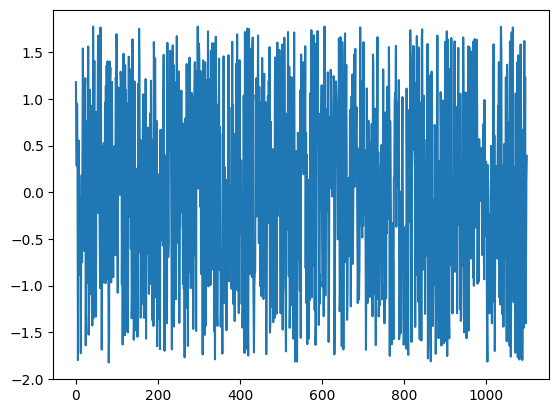

In [8]:
plt.plot(X)

In [9]:
X

array([ 1.17952179,  0.64772422,  0.28490737, ..., -0.8899247 ,
        0.11563847,  0.39023665])

In [10]:
Y = []
for i in X:
    Y.append(2*i + 3)

In [11]:
Y = np.array(Y)

In [12]:
Y

array([5.35904358, 4.29544844, 3.56981474, ..., 1.22015059, 3.23127694,
       3.7804733 ])

In [13]:
X_train = X[:1000]
X_test = X[1000:]
Y_train = Y[:1000]
Y_test = Y[1000:]

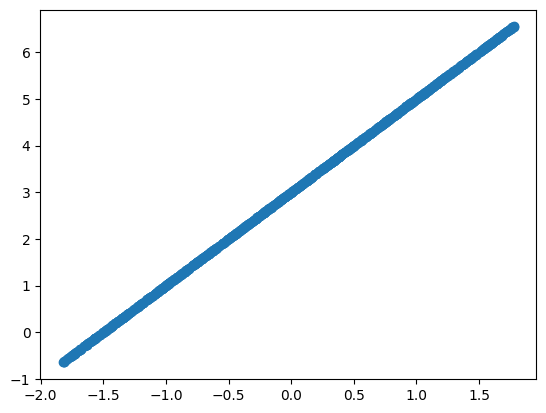

In [14]:
plt.scatter(X_train, Y_train)

In [15]:
def hypothesis(X, theta):
    y = theta[0] + X*theta[1]
    return y

In [16]:
def cost(X, Y, theta):
    error = 0
    
    for i in range(X.shape[0]):
        y_p = hypothesis(X[i], theta)
        
        error += (y_p - Y[i])**2
        
    return error/X.shape[0]

In [17]:
def gradient(X, Y, theta):
    grad = np.zeros((2, ))
    
    for i in range(X.shape[0]):
        y_p = hypothesis(X[i], theta)
        
        grad[0] += (y_p - Y[i])*1
        grad[1] += (y_p - Y[i])*X[i]
        
    return grad/X.shape[0]

In [18]:
def gradient_descent(X, Y):
    theta = np.zeros((2, ))
    
    max_epochs = 1000
    epoch_loss = []
    lr = 0.03
    
    for i in range(max_epochs):
        grad = gradient(X, Y, theta)
        
        loss = cost(X, Y, theta)
        epoch_loss.append(loss)
        
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        
    return theta, epoch_loss

In [19]:
theta, cost_list = gradient_descent(X_train, Y_train)

In [20]:
cost_list

[13.096378350716927,
 12.316731583822191,
 11.583498379550258,
 10.893915665434736,
 10.24538485919249,
 9.635462076348958,
 9.061848920820074,
 8.522383823746873,
 8.01503389794372,
 7.537887277265396,
 7.089145912024521,
 6.667118793310128,
 6.270215580673803,
 5.896940609170744,
 5.545887253171653,
 5.215732625706298,
 4.905232593364304,
 4.6132170879671355,
 4.338585697344084,
 4.080303518596878,
 3.8373972582262454,
 3.608951564424592,
 3.394105577713248,
 3.1920496869261803,
 3.0020224783152654,
 2.8233078662804316,
 2.6552323949122028,
 2.49716270017782,
 2.348503123187665,
 2.2086934655478414,
 2.0772068783402733,
 1.9535478767753514,
 1.8372504730355148,
 1.7278764202737023,
 1.6250135611494707,
 1.5282742746794302,
 1.437294015549206,
 1.3517299403825278,
 1.271259615790752,
 1.19557980333429,
 1.1244053168172174,
 1.0574679476090287,
 0.994515453943664,
 0.9353106103872271,
 0.8796303138923857,
 0.8272647430708188,
 0.7780165675154757,
 0.7317002041931792,
 0.688141118105346

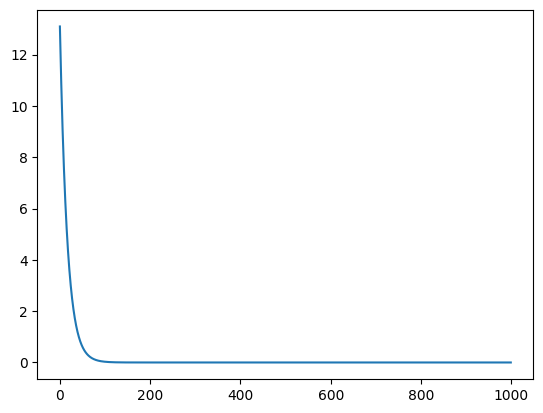

In [22]:
import matplotlib.pyplot as plt
plt.plot(cost_list)

In [23]:
theta

array([3., 2.])